# <u>Unit 4:</u> Descriptive Analytics for Numerical Variables
    
## <u>Case Study</u>: Fake and Real Instagram Accounts
•	We will use descriptive analytics to compare the distributions of the number of posts made by fake and real Instagram accounts.
•	Is there an association between the number of posts made by fake and real Instagram accounts in this dataset?
    

<!--# STAT 207: Data Science Exploration-->
## <u>Information</u>: Missing Values, Quantitative Variables and Distributions

In this section we first consider how to clean missing values for preliminary analysis. Then we study a number of ways to summarize and visualize quantitative information in the data. Key ideas are:

+ **Missing value codes** non-standard missing value types in an external file can be specified as an option in the pandas read_csv function. Checking for missing values is important, both because of they can casue errors in computing, and because they can influence interpretation of results.

+ **Quantitative/numerical data** - variables that contain specific numerical information for each indvidual observation. In a pandas dta frame we expect an entire column to be either quantitative (numerical), qualitative (categories, several possible text values, similar to "multiple choice" answers) or logical (special type of categories: True or False).

+ **Histograms** and **density plots** are useful for capturing the distribution of the data, showing modes, relative frequencies and other features of the data in one graph.

+ **Summary statistics** such as **quantiles** of the data, **mean**, **median**, **mode**, etc capture certain features that are often of interest in their own right or for comparison across levels of another variable.

+ **Box plots** and **violin plots** provide quick views of key percentiles of a sample distributionm and are especially useful for comparing distributions of quantitative variables by levels of another categorical variable.

+ **Packages:** pandas, numpy, matplotlib.pyplot, seaborn

+ **Skills:** define our own functions to perform common tasks

## Imports

In the previous sections, we saw how to import Python packages that we need, and how to read an external data file into a python data frame. We also looked at some methods to get a sense of what type of information is in the data, and did simple frequency summaries and crosstabs for categorical variables in the data.

In this section we consider quantitative (ie. numerical) variables and consider some methods for investigating the distributions of the variables as well as relations between them. before!**

In [1]:
import pandas as pd     # 'pd' is our nickname for 'pandas'
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 1. <u> Missing Data Checking</u>:  How do we check for missing data observations that have not yet been “detected” and “coded” as NaN yet?


We consider the Instagram dataset again, and reimport them to make this section's notebook self contained. However, now this dataset is contained in a new csv file: **fake_insta_updated.csv'.**

**Be careful! This new csv may have more realistic "issues" with it than the "clean" fake_insta.csv file we were using!**

### First let's read the csv into a dataframe like we would normally.

In [2]:
#Read into a dataframe
df = pd.read_csv('fake_insta_updated.csv')   
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604,real
1,yes,5,64,3,35,6,real
2,yes,2,82,319,328,668,real
3,yes,1,143,273,14890,7369,real
4,yes,1,76,6,225,356,real


### Let's check the shape of the dataframe.

In [3]:
df.shape

(120, 7)

Again, we see that this dataset has 120 rows (ie. Instagram accounts) as the previous dataset from Unit 2 did.

### How many "missing values" are our pandas function able to *detect*?

Note there may still be some missing values in the data that pandas function are not currently able to *detect* yet?

In [4]:
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          0
account_type               0
dtype: int64

Currently we are detecing no missing values in any of the columns.

### Now's let's investigate the *types* of data contained in each column of the dataframe df.

We can use the **.dtype** attribute to return this information.

In [5]:
df.dtypes

has_a_profile_pic          object
number_of_words_in_name     int64
num_characters_in_bio       int64
number_of_posts             int64
number_of_followers         int64
number_of_follows          object
account_type               object
dtype: object

### What's unusual about this?

The number of follows that an instagram account has should be an integer. We can see that the other numerical variables in this dataframe (ie. number_of_words_in_name, num_characters_in_bio, number_of_posts, number_of_followers) are comprised of "int64" (ie. integer) observations.

So why is 'number_of_follows' not listed as containing only integers?

### Let's investigate every **unique** value of this column specifically.

We can use the **.unique()** function to do this.

In [6]:
df['number_of_follows'].unique()

array(['604', '6', '668', '7369', '356', '424', '254', '521', '143',
       '358', '492', '436', '437', '622', '141', '337', '499', '605',
       '199', '694', '276', "Don't know/Refused (VOL.)", '367', '157',
       '545', '138', '1395', '490', '347', '5514', '552', '573', '963',
       '449', '562', '346', '151', '148', '3504', '185', '293', '549',
       '466', '993', '1111', '40', '1055', '482', '47', '274', '223',
       '363', '568', '535', '577', '474', '505', '2', '64', '30', '82',
       '124', '25', '33', '34', '38', '18', '1', '15', '22', '353', '24',
       '2287', '6153', '31', '250', '6172', '2129', '324', '126', '350',
       '764', '3239', '920', '105', '58', '55', '175', '202', '636', '72',
       '7453', '162', '829', '776', '942', '1445', '4239', '1381', '669',
       '235', '7', '270', '76', '811', '164', '3572', '1695', '68'],
      dtype=object)

### So what went wrong here?
Oops, there are two problems here!

1. There is a type of **missing value**: the text entries, "Don't know/Refused (VOL.)". Our numerical functions might choke on this;

2. Because of the text entries, the entire column was read as character data rather than numerical data. 

### Re-read the Dataframe and Indicate that "Don't know/Refused (VOL.)" should be Converted to a NaN. 

We can "clean" the data by adding "Don't know/Refused (VOL.)" to the list of missing values and re-read the data. Here is the Python code and the results:

In [7]:
#List of missing values that you know should be represented as NaN when the dataframe is re-read.
missing_values = ["Don't know/Refused (VOL.)"]

#Read the dataframe again, using an additional parameter.
df = pd.read_csv('fake_insta_updated.csv', na_values=missing_values)
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604.0,real
1,yes,5,64,3,35,6.0,real
2,yes,2,82,319,328,668.0,real
3,yes,1,143,273,14890,7369.0,real
4,yes,1,76,6,225,356.0,real


### Let's check out the unique values for number_of_follows again.

In [8]:
df['number_of_follows'].unique()

array([6.040e+02, 6.000e+00, 6.680e+02, 7.369e+03, 3.560e+02, 4.240e+02,
       2.540e+02, 5.210e+02, 1.430e+02, 3.580e+02, 4.920e+02, 4.360e+02,
       4.370e+02, 6.220e+02, 1.410e+02, 3.370e+02, 4.990e+02, 6.050e+02,
       1.990e+02, 6.940e+02, 2.760e+02,       nan, 3.670e+02, 1.570e+02,
       5.450e+02, 1.380e+02, 1.395e+03, 4.900e+02, 3.470e+02, 5.514e+03,
       5.520e+02, 5.730e+02, 9.630e+02, 4.490e+02, 5.620e+02, 3.460e+02,
       1.510e+02, 1.480e+02, 3.504e+03, 1.850e+02, 2.930e+02, 5.490e+02,
       4.660e+02, 9.930e+02, 1.111e+03, 4.000e+01, 1.055e+03, 4.820e+02,
       4.700e+01, 2.740e+02, 2.230e+02, 3.630e+02, 5.680e+02, 5.350e+02,
       5.770e+02, 4.740e+02, 5.050e+02, 2.000e+00, 6.400e+01, 3.000e+01,
       8.200e+01, 1.240e+02, 2.500e+01, 3.300e+01, 3.400e+01, 3.800e+01,
       1.800e+01, 1.000e+00, 1.500e+01, 2.200e+01, 3.530e+02, 2.400e+01,
       2.287e+03, 6.153e+03, 3.100e+01, 2.500e+02, 6.172e+03, 2.129e+03,
       3.240e+02, 1.260e+02, 3.500e+02, 7.640e+02, 

The missing value is now properly coded for our purposes, and, importantly, 'age' is now a numerical variable rather than a text variable (numbers like 6.04e+02 (aka $6.04\times 10^2=604$), ... not character strings like '604', ...) 

### How many NaN values are there now?

In [9]:
df.isna().sum()

has_a_profile_pic          0
number_of_words_in_name    0
num_characters_in_bio      0
number_of_posts            0
number_of_followers        0
number_of_follows          2
account_type               0
dtype: int64

We now see that there were 2 missing values in the number_of_follows column.

### Drop missing values.

In order to ensure that all of our functions will run appropriately, let's drop all of the rows that have missing values from the dataframe df.

In [10]:
df=df.dropna()
df.head()

,has_a_profile_pic,number_of_words_in_name,num_characters_in_bio,number_of_posts,number_of_followers,number_of_follows,account_type
0,yes,1,30,35,488,604.0,real
1,yes,5,64,3,35,6.0,real
2,yes,2,82,319,328,668.0,real
3,yes,1,143,273,14890,7369.0,real
4,yes,1,76,6,225,356.0,real


#### Notice how df has 2 fewer rows than it did before.

In [11]:
df.shape

(118, 7)

## 2.	<u>Visualizations for a Single Numerical Variable</u>: What are three plots that we can use to visualize the distribution of a single numerical variable?

1. Histograms
2. Boxplots
3. Violin plots

## 3.<u>Histograms</u>: Types of histograms

### 3.1 Frequency Histogram
Let's plot a **frequency histogram** for number_of_follows using the matpotlib.pyplot **hist()** function. 

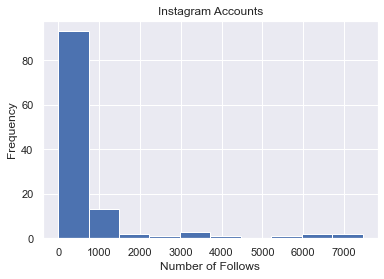

In [12]:
# pandas function for histograms
df['number_of_follows'].hist()
plt.xlabel("Number of Follows")
plt.ylabel("Frequency")
plt.title('Instagram Accounts')
plt.show()

In this graph the number of follows range is divided into equal width bins, and the height of the bar is the number of observations with number of follows values in each bin. The total area under this curve should be the total sample size. We can see the data a minimum around 0 and a maximum of around 7500.


### 3.2 Density Histogram
Often we will want the **density histogram** instead. In this plot the **area** of each bar represents the **proportion** of the sample in that bin. In the current version of matplotlib we specify the option **density=True** to get the density histogram.


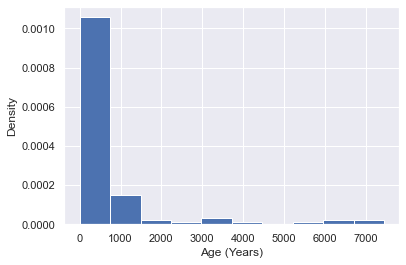

In [13]:
# option for density histrgram where area under the curve = 1
df['number_of_follows'].hist(density=True)
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.show()

The shape of the density histrogram looks the same as the frequency histogram, but it has been normalize to make the total area under the histogram equal 1.

### 3.3 Density Histogram Fitted with a Density Curve

An alterative graph, using seaborn, includes both the **density histogram** and a smooth fitted **density curve** using the seaborn **distplot( )** function. The smooth density curve is another way to represent the distribution of the data, smoothing out some of the random jaggedness due to binning the data in the density histogram.

C:\Users\vellison\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


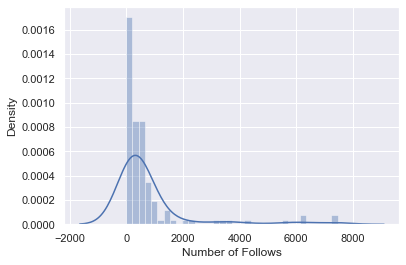

In [14]:
# using seaborn function for histograms and density curves
sns.distplot(df['number_of_follows'])
plt.ylabel('Density')
plt.xlabel("Number of Follows")
plt.show()

What determines the vertical scale for the **density histogram** and the superimposed **smooth density curve**? Each of these graphs represents the **relative frequency** (i.e. the proportion) of values in different age ranges as the area under the curve for those ranges. So, the total area for the whole range must =1. 

## 4.<u>Using Frequency Histograms</u>: How to estimate the proportion of observations that are within a given range?
If we wanted the proportion of ages in the sample between 0 and 400, we would take either do one of the following.

* **Way 1:** the sum of the areas of the histogram bars for that range (area = base width * height).

* **Way 2:** If you have a density curve, some approximation to the area underneath of the curve between 0 and 400. (Note if the density curve is not a good approximation for the histogram, these estimations may be very different!)


### In other words, we need the area between the vertical lines and under the curve in the figure below.

C:\Users\vellison\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


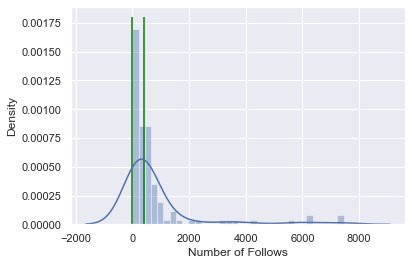

In [15]:
sns.distplot(df['number_of_follows'])
plt.ylabel('Density')
plt.xlabel("Number of Follows")
plt.vlines(x=[0,400], ymin=0, ymax=0.0018, color='green')
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## 5. <u>Describing a Single Numerical Variable Distribution</u>: What are four things we should always be ready to describe about the distribution of a numerical variable?

    
 
   
    



1. Shape
    * modality
    * skew
2. Measure of Center (Summary Statistics)
    * mean
    * median
3. Measure of Spread (Summary Statistics)
    * standard deviation
    * IQR
    * range
4. Any outliers?

## Calculating Summary Statistics for Pandas Data Frames


From the histogram we can estimate that minimum number of follows in the sample is around 0. To verify the actual minimum number of follws in the sample we compute it using the **min** function.

In [16]:
print("Minimum Number of Follows =", df['number_of_follows'].min())

Minimum Number of Follows = 1.0


It looks like we were close with our estimations, however the actual minimum is 1.

### What are some other summary statistics we might want to compute? Here are a few.

### Slow way to do this...

In [17]:
print("Median =", df['number_of_follows'].median())
print("Mean = ", df['number_of_follows'].mean())
print("Standard Deviation =  ", df['number_of_follows'].std())
print("First quartile (Q1) =", df['number_of_follows'].quantile(q=0.25))
print("Third quartile (Q3) =", df['number_of_follows'].quantile(q=0.75))
print("Maximum =", df['number_of_follows'].max())

Median = 354.5
Mean =  783.8898305084746
Standard Deviation =   1420.1630867217857
First quartile (Q1) = 109.75
Third quartile (Q3) = 660.0
Maximum = 7453.0


### Less slow way to do this...

That took a lot of typing. We can simplify this by copying the variable of interest into a pandas Series, say 'x'.

In [18]:
#First define a variable x to be the number_of_follows column in df.
x = df['number_of_follows'] 

#Then use 'x' instead in the code below. (write 'x' takes less time than writing 'df['number_of_follows']').
print("Median =", x.median())
print("Mean = ", x.mean())
print("Standard Deviation =  ", x.std())
print("First quartile (Q1) =", x.quantile(q=0.25))
print("Third quartile (Q3) =", x.quantile(q=0.75))
print("Maximum =", x.max())

Median = 354.5
Mean =  783.8898305084746
Standard Deviation =   1420.1630867217857
First quartile (Q1) = 109.75
Third quartile (Q3) = 660.0
Maximum = 7453.0


### Much faster way to do this...

We will learn how to **create** and **execute** our own functions in Python to speed up tedious coding exercises like above.


## 6. <u>Coding</u>: Create a Function in Python

What if we wanted to compute these summary statistics for a bunch of variables, or for differnt data sets? Python allows us to create our own functions to do general tasks. The benfit is we don't have to recode every time. Just reuse the function. Let's make a function to compute the summary statistics listed above. The structure is as follows.

    def function_name (arguments):
        statements
        return value
        
In python, the indentation of the statements and return lines must be 4 characters. Jupyter notebooks do this indenting automatically as you compose.

In our case, let's have our function put the summary statistics into a data frame for display purposes.

In [19]:
def mysummary(series):
    index = ['min', 'Q1', 'med', 'Q3', 'max', 'mean', 'std']
    value = [series.min(), 
             series.quantile(q=0.25), 
             series.median(), 
             series.quantile(q=0.75),
             series.max(),
             series.mean(),
             series.std()]
    return pd.DataFrame({'value': value}, index=index)

## 7. <u>Coding:</u> Using a Function that we have Created in Python

Now that we've defined it we can use it for any quantitative variable.

In [20]:
mysummary(df['number_of_follows'])

,value
min,1.000000
Q1,109.750000
med,354.500000
Q3,660.000000
max,7453.000000
mean,783.889831
std,1420.163087


## Combining Things We've Learned
What if we wanted the summary statistics for number_of_follows for fake and real Instagram accounts separately?

In [21]:
print('Number of Follows Summary Statistics for Fake Accounts')
mysummary(df['number_of_follows'][df['account_type']=='fake'])

Number of Follows Summary Statistics for Fake Accounts


,value
min,1.000000
Q1,33.000000
med,163.000000
Q3,784.750000
max,7453.000000
mean,853.933333
std,1607.370923


In [22]:
print('Number of Follows Summary Statistics for Real Accounts')
mysummary(df['number_of_follows'][df['account_type']=='real'])

Number of Follows Summary Statistics for Real Accounts


,value
min,6.000000
Q1,276.000000
med,470.000000
Q3,576.000000
max,7369.000000
mean,711.431034
std,1206.264905


## 8. <u>Subsetting a Dataframe</u> with Indices that have names (not numbers).

#### Extracting a subset of the results

What if we wanted to extract Q1 from the summary? Using the **.loc** function, we can refer directly to the rown **name** in the data frame of results. This differs from the **.iloc function**, which refers to the row and column **number**. Specifying .value causes python to show only the value of the object, suppressing the display of the object type.

In [23]:
results = mysummary(df['number_of_follows'][df['account_type']=='fake'])
results.loc['Q3'].value

784.75

The **interquartile range** is a measure of spread defined as Q3 - Q1, i.e. the difference between the 75th percentile and the 25th percentile. In other words, it is the range of the middle half of the data. Let's compute it from our summary.

In [24]:
print('IQR = ', results.loc['Q3'].value - results.loc['Q1'].value)

IQR =  751.75


## 9. <u>Boxplots</u> for Numerical variables

Several of these types of summary statistics can be visualized using the **boxplot**, which typically includes the median, Q1, Q3 and thresholds for extreme values.

C:\Users\vellison\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


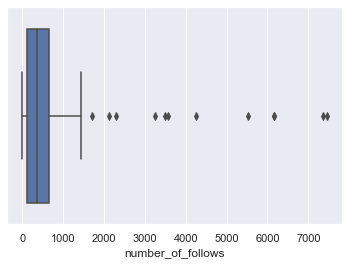

In [25]:
sns.boxplot(df['number_of_follows'])
plt.show()

### Features of the Boxplot
**Features of the box plot:**

+ The central line shows the **median** = 50th percentile (splits the data in half)
<br/>
<br/>
<br/>
<br/>
+ The central box goes from Q1 = 25th percentile to Q3 = 75th percentile
<br/>
<br/>
<br/>
<br/>
+ The width of the box is the **interquartile range (IQR)** = Q3 - Q1
<br/>
<br/>
<br/>
<br/>
+ The low and high bars ("whiskers") are by default 1.5 * IQR below Q1 and above Q3, meant to be thresholds for flagging possible outliers
<br/>
<br/>
<br/>
<br/>
+ If the minimum is above Q1 - 1.5 * IQR the whisker = the minimum
<br/>
<br/>
<br/>
<br/>
+ If the maximum is bleow Q3 + 1.5 * IQR the whisker = the maximum
<br/>
<br/>
<br/>
<br/>



## 10. <u>Violin Plots</u> for a Numerical Variable

C:\Users\vellison\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


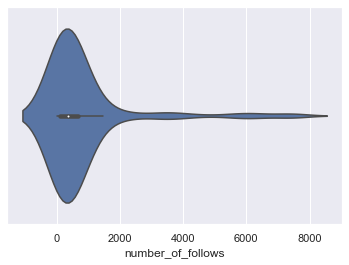

In [26]:
sns.violinplot(df['number_of_follows'])
plt.show()

## 11. <u>Categorical and Numerical Variable</u>: How to visualize the relationship between a numerical and categorical variable.
### Using Boxplots and/or Violin plots - to Compare Numerical Distributions of Two Categories

A single boxplot like this tells us where the major percentiles are, and possibly flag outlier observations, but is not as informative as the density plot. However, boxplots can be very useful for *comparing* different subgroups. 

For example, let's compare the number of follows distributions for fake vs. real accounts.

In [27]:
# contents of the 'sample' column of the data:
df['account_type'].value_counts()

fake    60
real    58
Name: account_type, dtype: int64

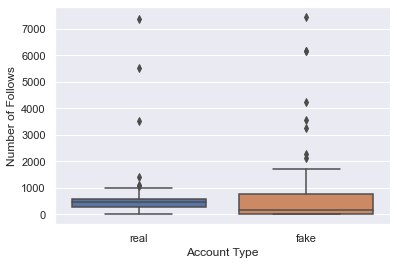

In [28]:
# seaborn's boxplot function. 
# Specify which data frame using the 'data=' argument.
sns.boxplot(x='account_type', y='number_of_follows', data=df)
plt.xlabel("Account Type")
plt.ylabel("Number of Follows")
plt.show()

The **violin plot** is an alternative to the boxplot that includes representations of the data density within each group, in addition to an embedded box plot. Because it conveys more information, it has gained in popularity in recent year versus the boxplot.

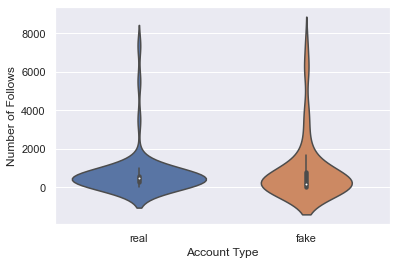

In [29]:
sns.violinplot(x='account_type', y='number_of_follows', data=df)
plt.xlabel("Account Type")
plt.ylabel("Number of Follows")
plt.show()

How does this compare with your intuition? This is an example of how to visualize the relationship between a **quantitative** variable (age) and a **qualitative** variable (phone type).

## 12. <u>Putting it all together</u>: Is there an association between number of posts and fake and real Instagram accounts in the dataset?

### 1. Compare the distribution of follows for real and fake accounts in this dataset.
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### 2. Is there a strong association between fake vs. real accounts and the number of follows in this dataset?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign